In [1]:
import pandas as pd
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
#Lee el excel generado en el otro documento .ipynb
ddbb=pd.read_excel("/Github/DecatlonEstadistics/resources/data.xlsx")
del ddbb['1500m NF']

ddbb['Country']=ddbb['Country'].str.lower()

ddbb.columns = ['Position', 'Athlete', 'Age', 'Country', 'Total Points', 'Year', 'Competition', '100m', 
                 '100m Points', 'Lj', 'Lj Points', 'Sp', 'Sp Points', 'Hj', 'Hj Points', '400m', '400m Points', 
                 '110m H', '110m H Points', 'Dt', 'Dt Points', 'Pv', 'Pv Points', 'Jt', 'Jt Points', 
                 '1500m Points', '1500m']

In [3]:
#Coge unicamente los datos de cada prueba y sus puntuaciones 
#Para poder aplicar el algoritmo PCA
ddbbData = ddbb[['100m','100m Points','Lj','Lj Points','Sp','Sp Points',
                 'Hj','Hj Points','400m Points','400m','110m H','110m H Points','Dt','Dt Points',
                 'Pv','Pv Points','Jt','Jt Points','1500m Points','1500m']]

In [4]:
############################################################################
######################## Algoritmo PCA #####################################
############################################################################
pca = PCA(n_components=2)
new = pca.fit_transform(ddbbData)

Text(0.5, 1.0, 'Mayor variación en puntuacion PC2')

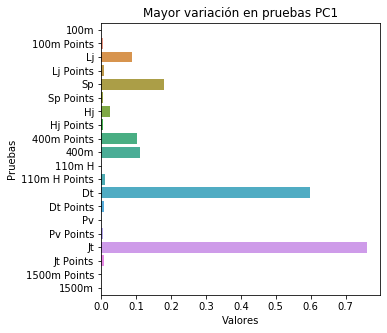

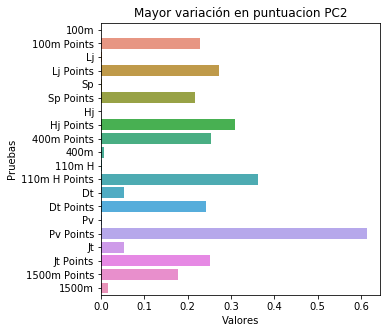

In [46]:
#Muestra la importancia de las caracteristicas en porcentajes
importancia = abs( pca.components_ )
importancia

imp = pd.DataFrame({'Pruebas': ['100m','100m Points','Lj','Lj Points','Sp','Sp Points',
                    'Hj','Hj Points','400m Points','400m','110m H','110m H Points','Dt','Dt Points',
                    'Pv','Pv Points','Jt','Jt Points','1500m Points','1500m'], 'Valores': importancia[0]})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp).set_title('Mayor variación en pruebas PC1')

imp = pd.DataFrame({'Pruebas': ['100m','100m Points','Lj','Lj Points','Sp','Sp Points',
                    'Hj','Hj Points','400m Points','400m','110m H','110m H Points','Dt','Dt Points',
                    'Pv','Pv Points','Jt','Jt Points','1500m Points','1500m'], 'Valores': importancia[1]})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp).set_title('Mayor variación en puntuacion PC2')

In [6]:
############################################################################
######################## Atleta más joven JJOO #############################
############################################################################

edadMin = 999
aux = 0
pos = 0

for i in ddbb['Age']:
    if(edadMin > i and i!=0):
        edadMin = i
        pos = aux
    aux = aux +1

print("El atleta más joven en participar en unos JJOO es:",ddbb.iloc[pos]['Athlete'], "con", 
      ddbb.iloc[pos]['Age'],"años en el año", ddbb.iloc[pos]['Year'],"en la posicion", ddbb.iloc[pos]['Position'])

El atleta más joven en participar en unos JJOO es: Bob Mathias con 17 años en el año 1948 en la posicion 1


In [7]:
############################################################################
######################## Atleta más mayor JJOO #############################
############################################################################

edadMax = 0
aux = 0
pos = 0

for i in ddbb['Age']:
    if(edadMax < i and i!=0):
        edadMax = i
        pos = aux
    aux = aux +1

print("El atleta más mayor en participar en unos JJOO es:",ddbb.iloc[pos]['Athlete'], "con", 
      ddbb.iloc[pos]['Age'],"años en el año", ddbb.iloc[pos]['Year'],"en la posicion", ddbb.iloc[pos]['Position'])

El atleta más mayor en participar en unos JJOO es: Witold Gerutto con 35 años en el año 1948 en la posicion 19


In [8]:
############################################################################
####################### Atleta más joven en ganar JJOO #####################
############################################################################

edadMin = 999
aux = 0
pos = 0

for i in ddbb['Age']:
    if(edadMin > i and i!=0 and ddbb.iloc[aux]['Position'] == "1"):
        edadMin = i
        pos = aux
    aux = aux +1

print("El atleta más joven en ganr unos JJOO es:",ddbb.iloc[pos]['Athlete'], "con", 
      ddbb.iloc[pos]['Age'],"años en el año", ddbb.iloc[pos]['Year'])

El atleta más joven en ganr unos JJOO es: Bob Mathias con 17 años en el año 1948


In [9]:
############################################################################
##################### Atleta más mayor en ganar JJOO #######################
############################################################################

edadMax = 0
aux = 0
pos = 0

for i in ddbb['Age']:
    if(edadMax < i and i!=0 and ddbb.iloc[aux]['Position'] == "1"):
        edadMax = i
        pos = aux
    aux = aux +1

print("El atleta más mayor en participar en unos JJOO es:",ddbb.iloc[pos]['Athlete'], "con", 
      ddbb.iloc[pos]['Age'],"años en el año", ddbb.iloc[pos]['Year'])

El atleta más mayor en participar en unos JJOO es: Dan O'Brien con 30 años en el año 1996


In [10]:
############################################################################
##################### Record puntuación en unos JJOO #######################
############################################################################

puntMax = 0
aux = 0
pos = []

for i in ddbb['Total Points']:
    if(puntMax <= i and ddbb.iloc[aux]["Competition"] == 'JJOO'):
        if(puntMax == i):
            pos.append(aux)
        else:
            puntMax = i
            pos.clear()
            pos.append(aux)
    aux = aux+1

for i in pos:
    print("El atleta que posee el recor olímpico es", ddbb.iloc[i]['Athlete'],"con una puntuacion de",
         ddbb.iloc[i]['Total Points'],"en los JJOO del año",ddbb.iloc[i]['Year'])

El atleta que posee el recor olímpico es Roman Å ebrle con una puntuacion de 8893 en los JJOO del año 2004
El atleta que posee el recor olímpico es Ashton Eaton con una puntuacion de 8893 en los JJOO del año 2016


In [11]:
############################################################################
##################### Record puntuación en los WC ##########################
############################################################################

puntMax = 0
aux = 0
pos = []

for i in ddbb['Total Points']:
    if(puntMax <= i and ddbb.iloc[aux]["Competition"] == 'WC'):
        if(puntMax == i):
            pos.append(aux)
        else:
            puntMax = i
            pos.clear()
            pos.append(aux)
    aux = aux+1

for i in pos:
    print("El atleta que posee el recor olímpico es", ddbb.iloc[i]['Athlete'],"con una puntuacion de",
         ddbb.iloc[i]['Total Points'],"en los JJOO del año",ddbb.iloc[i]['Year'])

El atleta que posee el recor olímpico es Ashton Eaton con una puntuacion de 9045 en los JJOO del año 2015


El número de países participantes es 87


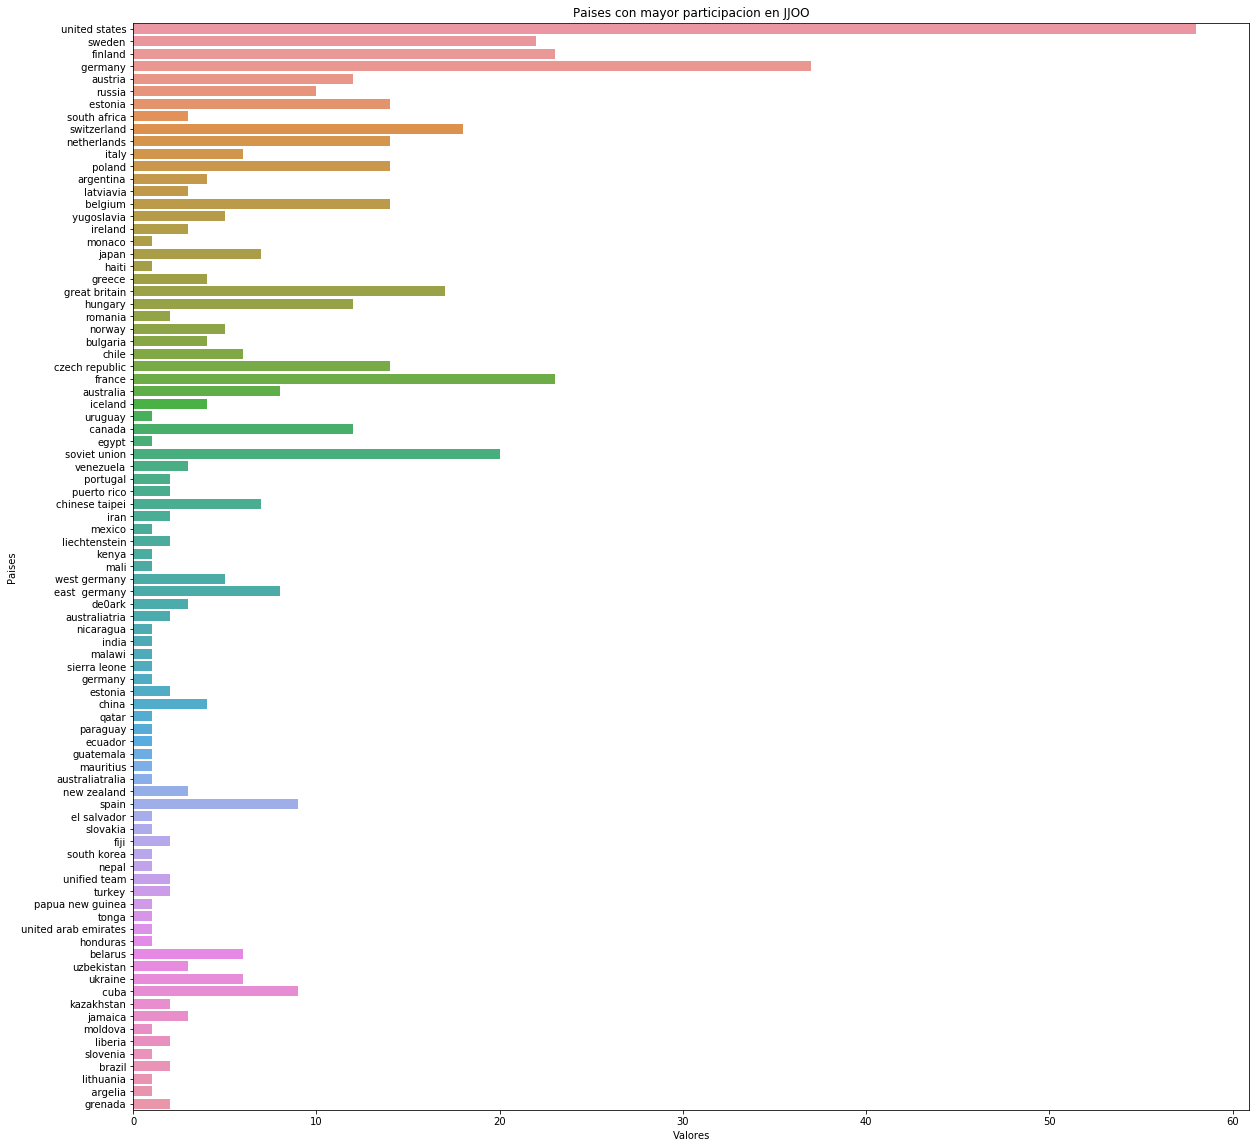

In [65]:
############################################################################
############# Paises con mayor participacion en JJOO #######################
############################################################################

paises = []
cantidad = []

aux = 0
cont = 0

for i in ddbb['Country']:
    if (i not in paises and ddbb.iloc[cont]['Competition'] == "JJOO"):
        paises.append(i)
        cantidad.append(1)
    elif (i in paises and ddbb.iloc[cont]['Competition'] == "JJOO"):
        aux = paises.index(i)
        cantidad[aux] = cantidad[aux] +1
    cont = cont +1
        
imp = pd.DataFrame({'Paises': paises, 'Valores': cantidad})


plt.figure(figsize=(20,20))
sns.barplot(x = 'Valores', y = 'Paises', data = imp).set_title('Paises con mayor participacion en JJOO')

print("El número de países participantes es",len(paises))

El número de países participantes es 51


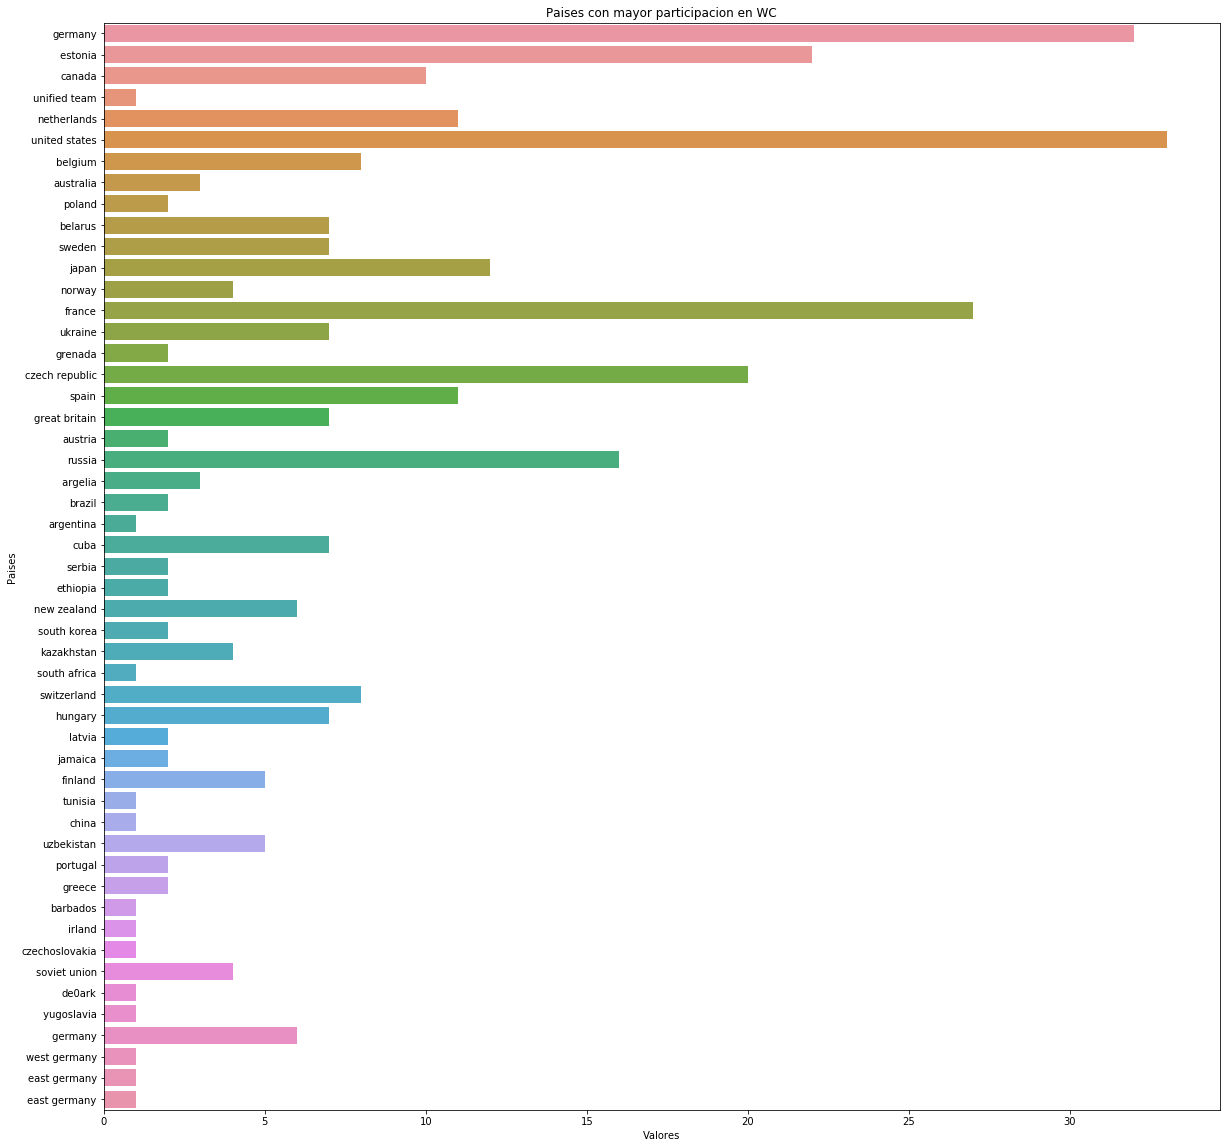

In [64]:
############################################################################
############# Paises con mayor participacion en WC #########################
############################################################################

paises = []
cantidad = []

aux = 0
cont = 0

for i in ddbb['Country']:
    if (i not in paises and ddbb.iloc[cont]['Competition'] == "WC"):
        paises.append(i)
        cantidad.append(1)
    elif (i in paises and ddbb.iloc[cont]['Competition'] == "WC"):
        aux = paises.index(i)
        cantidad[aux] = cantidad[aux] +1
    cont = cont +1
        
imp = pd.DataFrame({'Paises': paises, 'Valores': cantidad})


plt.figure(figsize=(20,20))
sns.barplot(x = 'Valores', y = 'Paises', data = imp).set_title('Paises con mayor participacion en WC')

print("El número de países participantes es",len(paises))